# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.stats.mstats import winsorize

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [ ]:
for column in df.columns[3:]:
    for year in df['YEAR'].unique():
        df[column].fillna(df[df['YEAR'] == year][column].mean(), inplace=True)

In [ ]:
df.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PRIMARY_KEY                       1715 non-null   object 
 1   STATE                             1715 non-null   object 
 2   YEAR                              1715 non-null   int64  
 3   ENROLL                            1715 non-null   float64
 4   TOTAL_REVENUE                     1715 non-null   float64
 5   FEDERAL_REVENUE                   1715 non-null   float64
 6   STATE_REVENUE                     1715 non-null   float64
 7   LOCAL_REVENUE                     1715 non-null   float64
 8   TOTAL_EXPENDITURE                 1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE           1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE      1715 non-null   float64
 11  OTHER_EXPENDITURE                 1715 non-null   float64
 12  CAPITA

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

In [ ]:
df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1.715000e+03,1.715000e+03
mean,7.940014e+06,8.038215e+06
std,1.032975e+07,1.052905e+07
min,4.656500e+05,4.816650e+05
25%,2.992297e+06,3.004448e+06
50%,4.572764e+06,4.653591e+06
75%,8.165744e+06,8.220253e+06
max,8.921726e+07,8.532013e+07


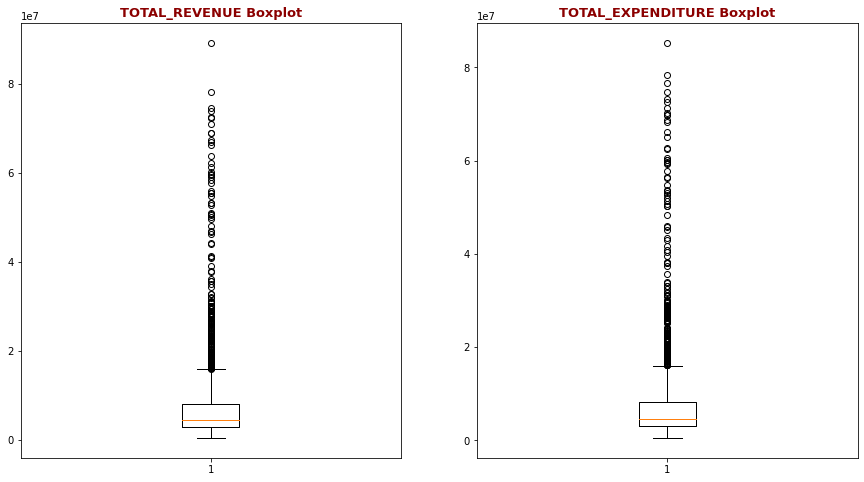

In [ ]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.boxplot(df.TOTAL_REVENUE)
plt.title("TOTAL_REVENUE Boxplot", fontdict=title_font)

plt.subplot(1, 2, 2)
plt.boxplot(df.TOTAL_EXPENDITURE)
plt.title("TOTAL_EXPENDITURE Boxplot", fontdict=title_font)


plt.show()

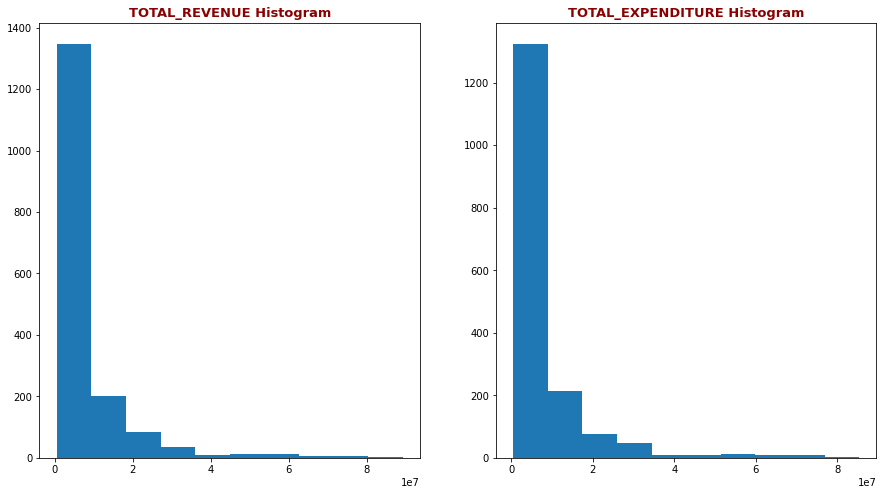

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.hist(df.TOTAL_REVENUE)
plt.title("TOTAL_REVENUE Histogram", fontdict=title_font)


plt.subplot(1, 2, 2)
plt.hist(df.TOTAL_EXPENDITURE)
plt.title("TOTAL_EXPENDITURE Histogram", fontdict=title_font)

plt.show()

**Z Score**

In [ ]:
z_scores_revenue = zscore(df["TOTAL_REVENUE"])
z_scores_expend = zscore(df["TOTAL_EXPENDITURE"])
print("Outlier Analysis for TOTAL_REVENUE\n")
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_revenue > threshold)[0]))))
    print('------')
print("\nOutlier Analysis for TOTAL_EXPENDITURE\n")
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_expend > threshold)[0]))))
    print('------')

Outlier Analysis for TOTAL_REVENUE

Threshold value: 1
Number of Outliers: 165
------
Threshold value: 2
Number of Outliers: 70
------
Threshold value: 3
Number of Outliers: 43
------
Threshold value: 4
Number of Outliers: 33
------

Outlier Analysis for TOTAL_EXPENDITURE

Threshold value: 1
Number of Outliers: 161
------
Threshold value: 2
Number of Outliers: 67
------
Threshold value: 3
Number of Outliers: 44
------
Threshold value: 4
Number of Outliers: 35
------


**Tukey Method**

In [ ]:
q75, q25 = np.percentile(df["TOTAL_REVENUE"], [75 ,25])
IQR = q75 - q25

In [ ]:
print("Total Revenue Outliers\n")
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((df["TOTAL_REVENUE"]> max_value)| (df["TOTAL_REVENUE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

Total Revenue Outliers



,threshold_value,outlier_value_number
0,1.0,246
1,1.5,195
2,2.0,161
3,2.5,132
4,3.0,111
5,3.5,90
6,4.0,70
7,4.5,54


In [ ]:
q75_ex, q25_ex = np.percentile(df["TOTAL_EXPENDITURE"], [75 ,25])
IQR_ex = q75_ex - q25_ex

In [ ]:
print("Total Expenditure Outliers\n")
threshold_values2=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25_ex - (IQR_ex*threshold_value)
    max_value = q75_ex + (IQR_ex*threshold_value)
    outlier_value_number = len((np.where((df["TOTAL_EXPENDITURE"]> max_value)| (df["TOTAL_EXPENDITURE"] < min_value))[0]))
    threshold_values2.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values2)

Total Expenditure Outliers



,threshold_value,outlier_value_number
0,1.0,246
1,1.5,195
2,2.0,160
3,2.5,134
4,3.0,109
5,3.5,95
6,4.0,67
7,4.5,56


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [ ]:

df['TOTAL_REVENUE_WINSORIZED']= winsorize(df.TOTAL_REVENUE, (0.15, 0.15))
df['TOTAL_EXPENDITURE _WINSORIZED']= winsorize(df.TOTAL_EXPENDITURE , (0.15, 0.15))


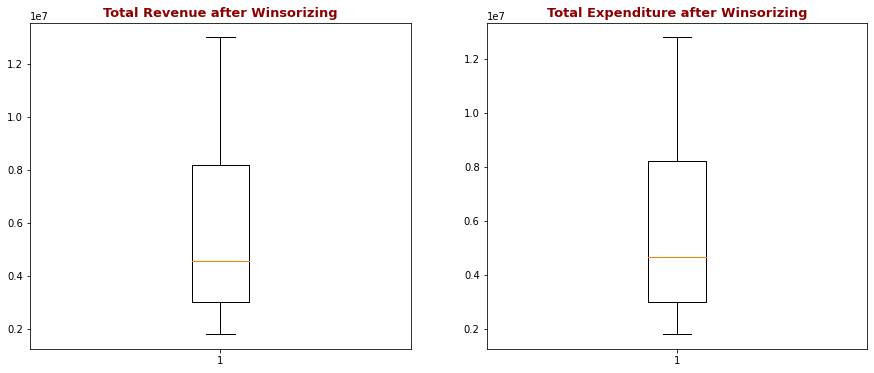

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['TOTAL_REVENUE_WINSORIZED'])
plt.title("Total Revenue after Winsorizing", fontdict=title_font)


plt.subplot(1, 2, 2)
plt.boxplot(df['TOTAL_EXPENDITURE _WINSORIZED'])
plt.title("Total Expenditure after Winsorizing", fontdict=title_font)

plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [ ]:
df['BUDGET_DEFICIT'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

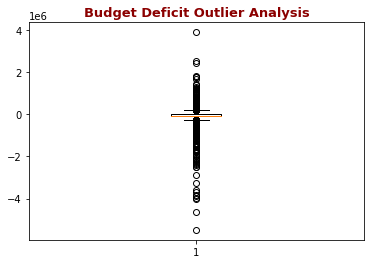

In [ ]:
plt.boxplot(df['BUDGET_DEFICIT'])
plt.title("Budget Deficit Outlier Analysis", fontdict=title_font)
plt.show()

In [ ]:
df['BUDGET_DEFICIT_WINSORIZED']= winsorize(df.BUDGET_DEFICIT, (0.15, 0.15))

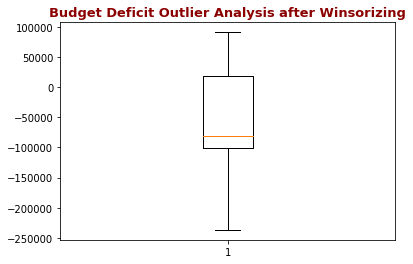

In [ ]:
plt.boxplot(df['BUDGET_DEFICIT_WINSORIZED'])
plt.title("Budget Deficit Outlier Analysis after Winsorizing", fontdict=title_font)
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [ ]:
df['BUDGET_DEFICIT_SECOND'] = df['TOTAL_REVENUE_WINSORIZED'] - df['TOTAL_EXPENDITURE _WINSORIZED']

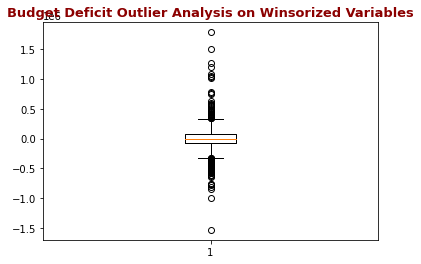

In [ ]:
plt.boxplot(df['BUDGET_DEFICIT_SECOND'])
plt.title("Budget Deficit Outlier Analysis on Winsorized Variables", fontdict=title_font)
plt.show()

In [ ]:
df['BUDGET_DEFICIT_SECOND_WINSORIZED']= winsorize(df.BUDGET_DEFICIT_SECOND, (0.15, 0.15))

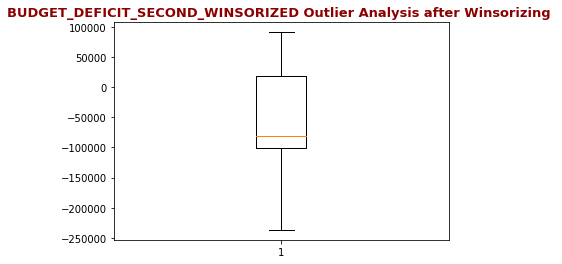

In [ ]:
plt.boxplot(df['BUDGET_DEFICIT_WINSORIZED'])
plt.title("BUDGET_DEFICIT_SECOND_WINSORIZED Outlier Analysis after Winsorizing ", fontdict=title_font)
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

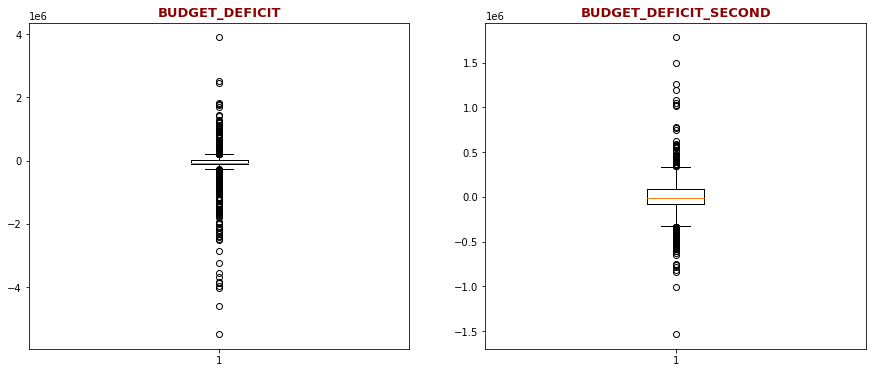

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.boxplot(df['BUDGET_DEFICIT'])
plt.title("BUDGET_DEFICIT", fontdict=title_font)

plt.subplot(1, 2, 2)
plt.boxplot(df['BUDGET_DEFICIT_SECOND'])
plt.title("BUDGET_DEFICIT_SECOND", fontdict=title_font)

plt.show()

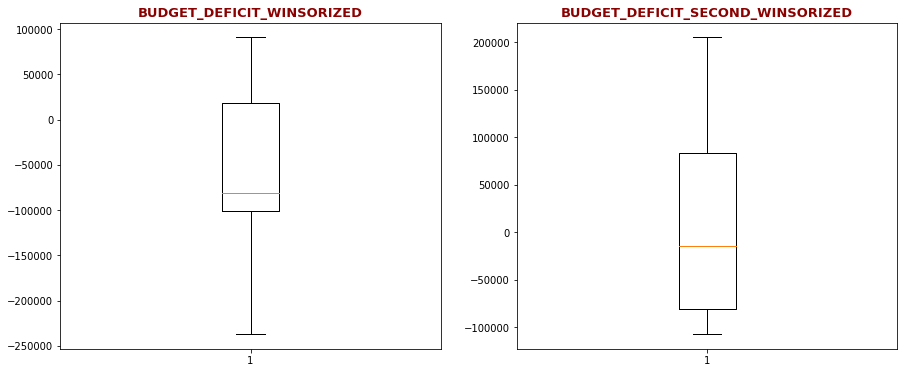

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.boxplot(df['BUDGET_DEFICIT_WINSORIZED'])
plt.title("BUDGET_DEFICIT_WINSORIZED", fontdict=title_font)

plt.subplot(1, 2, 2)
plt.boxplot(df['BUDGET_DEFICIT_SECOND_WINSORIZED'])
plt.title("BUDGET_DEFICIT_SECOND_WINSORIZED", fontdict=title_font)

plt.show()

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In [ ]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

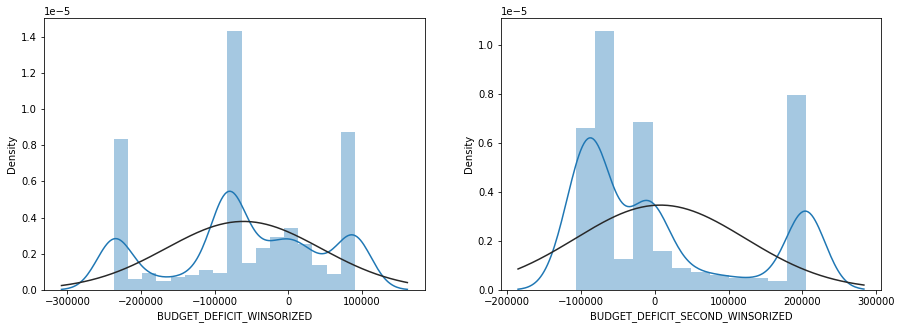

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['BUDGET_DEFICIT_WINSORIZED'],fit=norm);

plt.subplot(1,2,2)
sns.distplot(df['BUDGET_DEFICIT_SECOND_WINSORIZED'],fit=norm);
plt.show()

As we examined on the second plot, the budget deficit creation method after removing the outliers from the Revenue and Expenditure data had an effect on the distribution. And we can say that positive (right) skewness is beginning to be observed. In the first method, we can notice that the distribution of the data is more nearly normal. I guess it would be better to use the first method
